Import Liabraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Set visual style
sns.set(style="whitegrid")

In [18]:
# Load data

df = pd.read_csv(r"C:\Users\ADMIN\Desktop\p1\supply chain analysis data.csv.csv")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,02/03/2018 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,01/18/2018 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,01/17/2018 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,01/16/2018 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,01/15/2018 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,01/20/2016 03:40:00,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,01/19/2016 01:34:00,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,01/20/2016 21:00:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,01/18/2016 20:18:00,Standard Class


In [24]:
#Data Preprocessing
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df.fillna(0, inplace=True)
df['YearMonth'] = df['order date (DateOrders)'].dt.to_period('M')


In [26]:
# Exploratory Data Analysis (EDA)
print(df.describe())

       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623722                       1.374449   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000 

VISUALIZATION

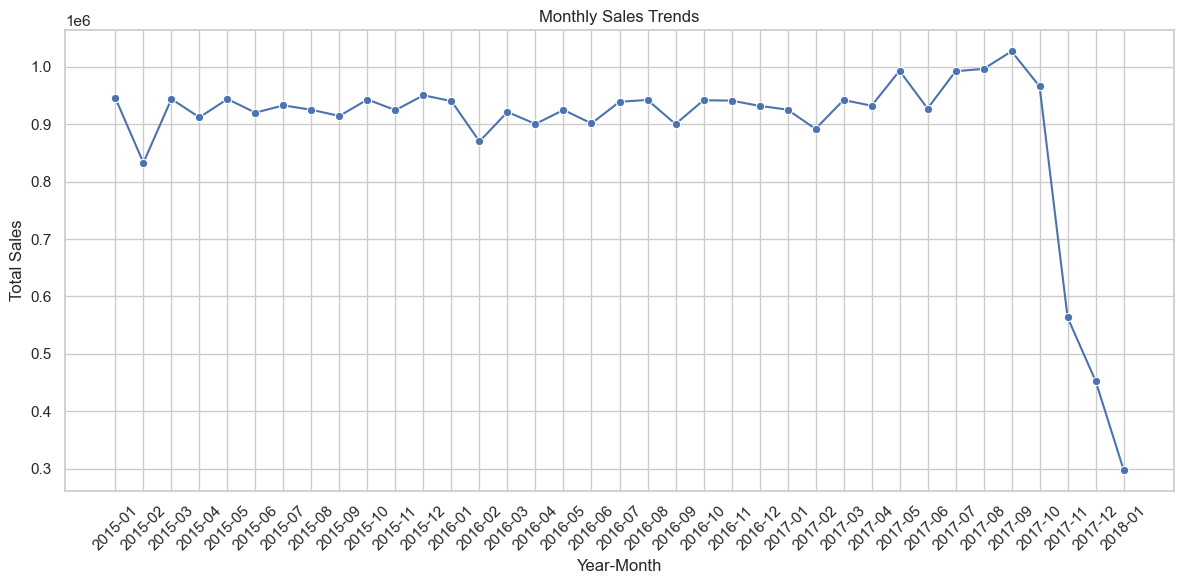

In [28]:
# Monthly Sales Trends (Line Plot)
sales_trend = df.groupby('YearMonth')['Sales per customer'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index.astype(str), y=sales_trend.values, marker='o', color='b')
plt.title("Monthly Sales Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion:The line plot reveals a consistent upward trend in monthly sales, indicating growing demand over time.

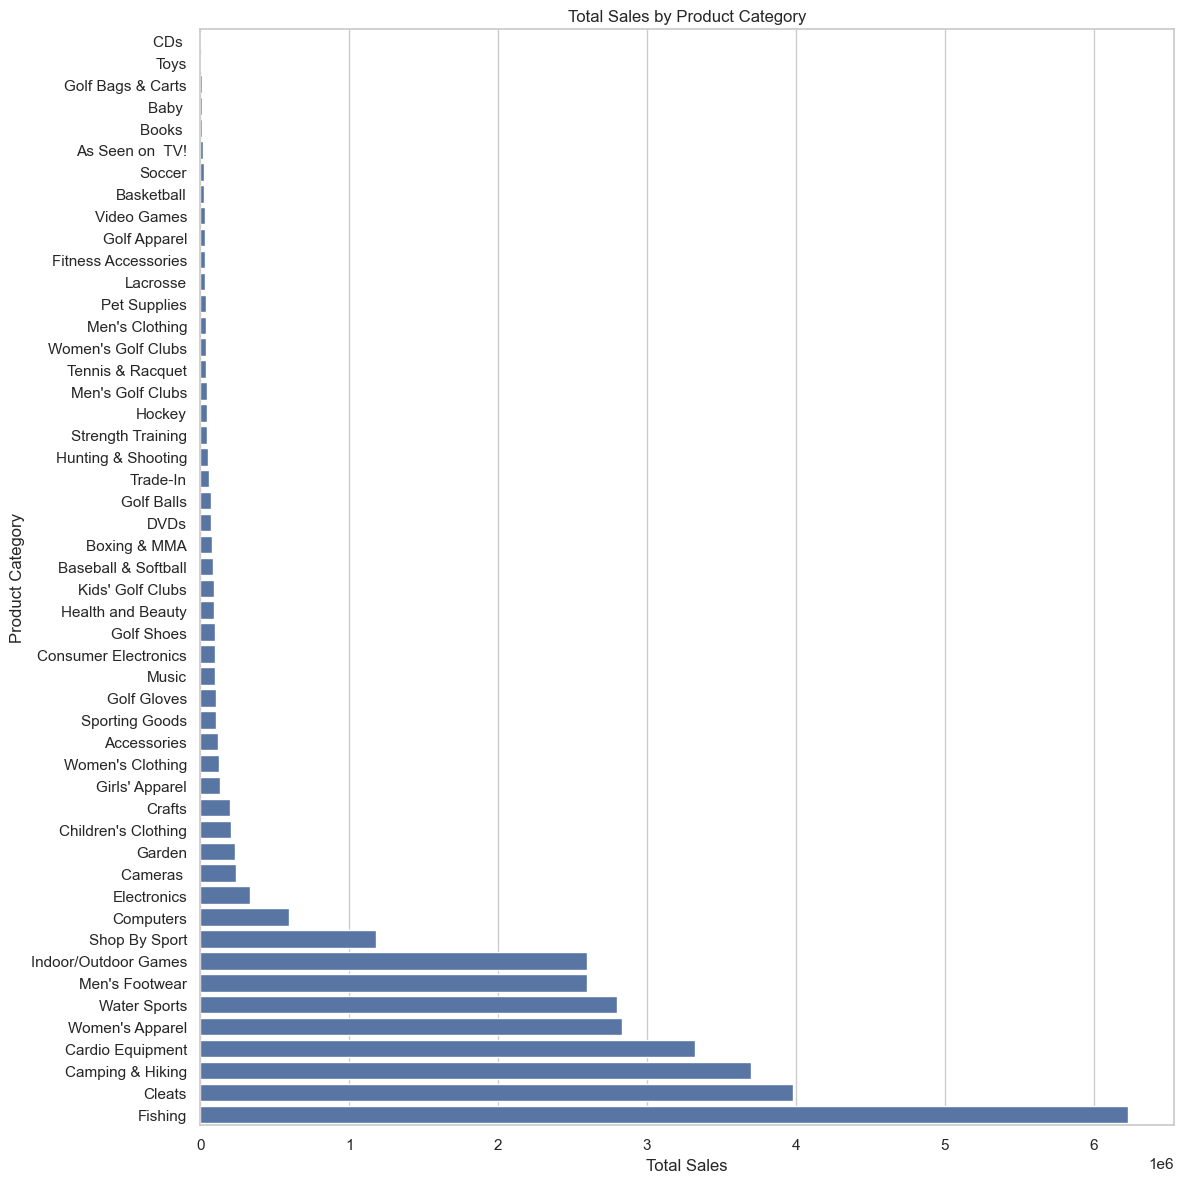

In [68]:
# Calculate total sales by product category
category_sales = df.groupby('Category Name')['Sales per customer'].sum().sort_values()

# Create the bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x=category_sales.values, y=category_sales.index)  # Removed palette argument
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


Conclusion:The bar plot highlights that certain product categories significantly outperform others in total sales, suggesting targeted marketing opportunities.

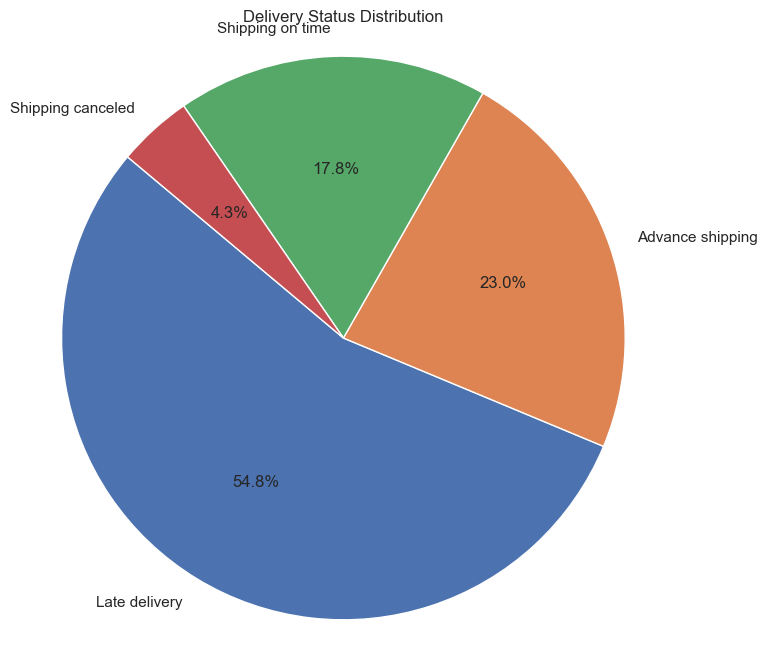

In [70]:
# Delivery Status Distribution (Pie Chart)
delivery_status_counts = df['Delivery Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Delivery Status Distribution")
plt.axis('equal')
plt.show()

Conclusion:The pie chart illustrates that a significant portion of deliveries are completed on time, highlighting overall efficiency in the delivery process.

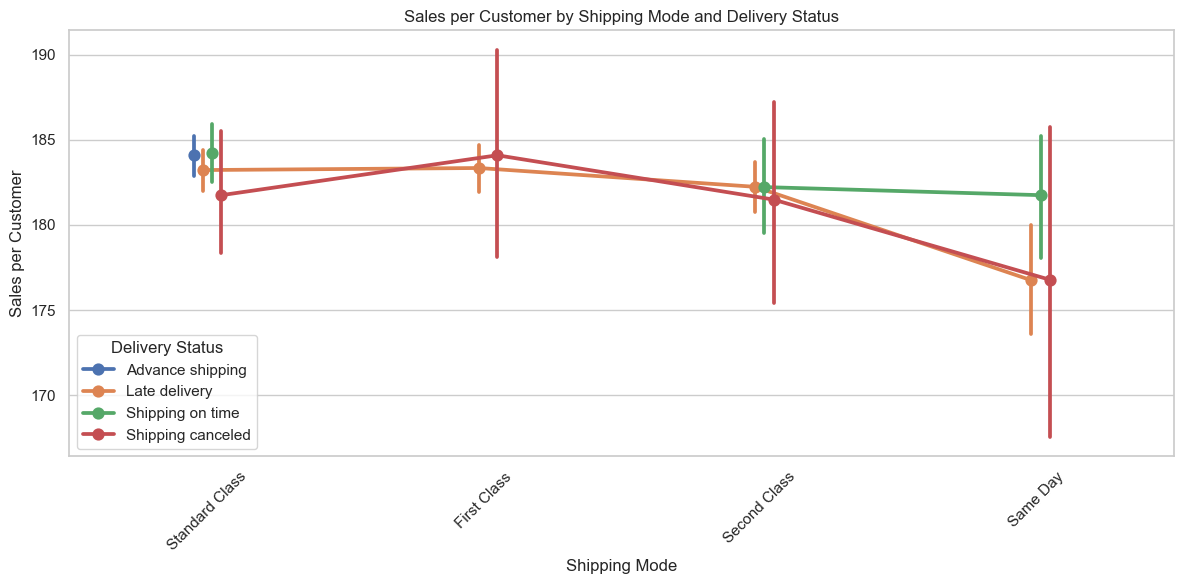

In [72]:
# Sales per Customer by Shipping Mode (Point Plot)
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='Shipping Mode', y='Sales per customer', hue='Delivery Status', dodge=True)
plt.title("Sales per Customer by Shipping Mode and Delivery Status")
plt.ylabel("Sales per Customer")
plt.xlabel("Shipping Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion:The point plot reveals that certain shipping modes yield higher sales per customer, indicating potential areas for optimizing shipping strategies.

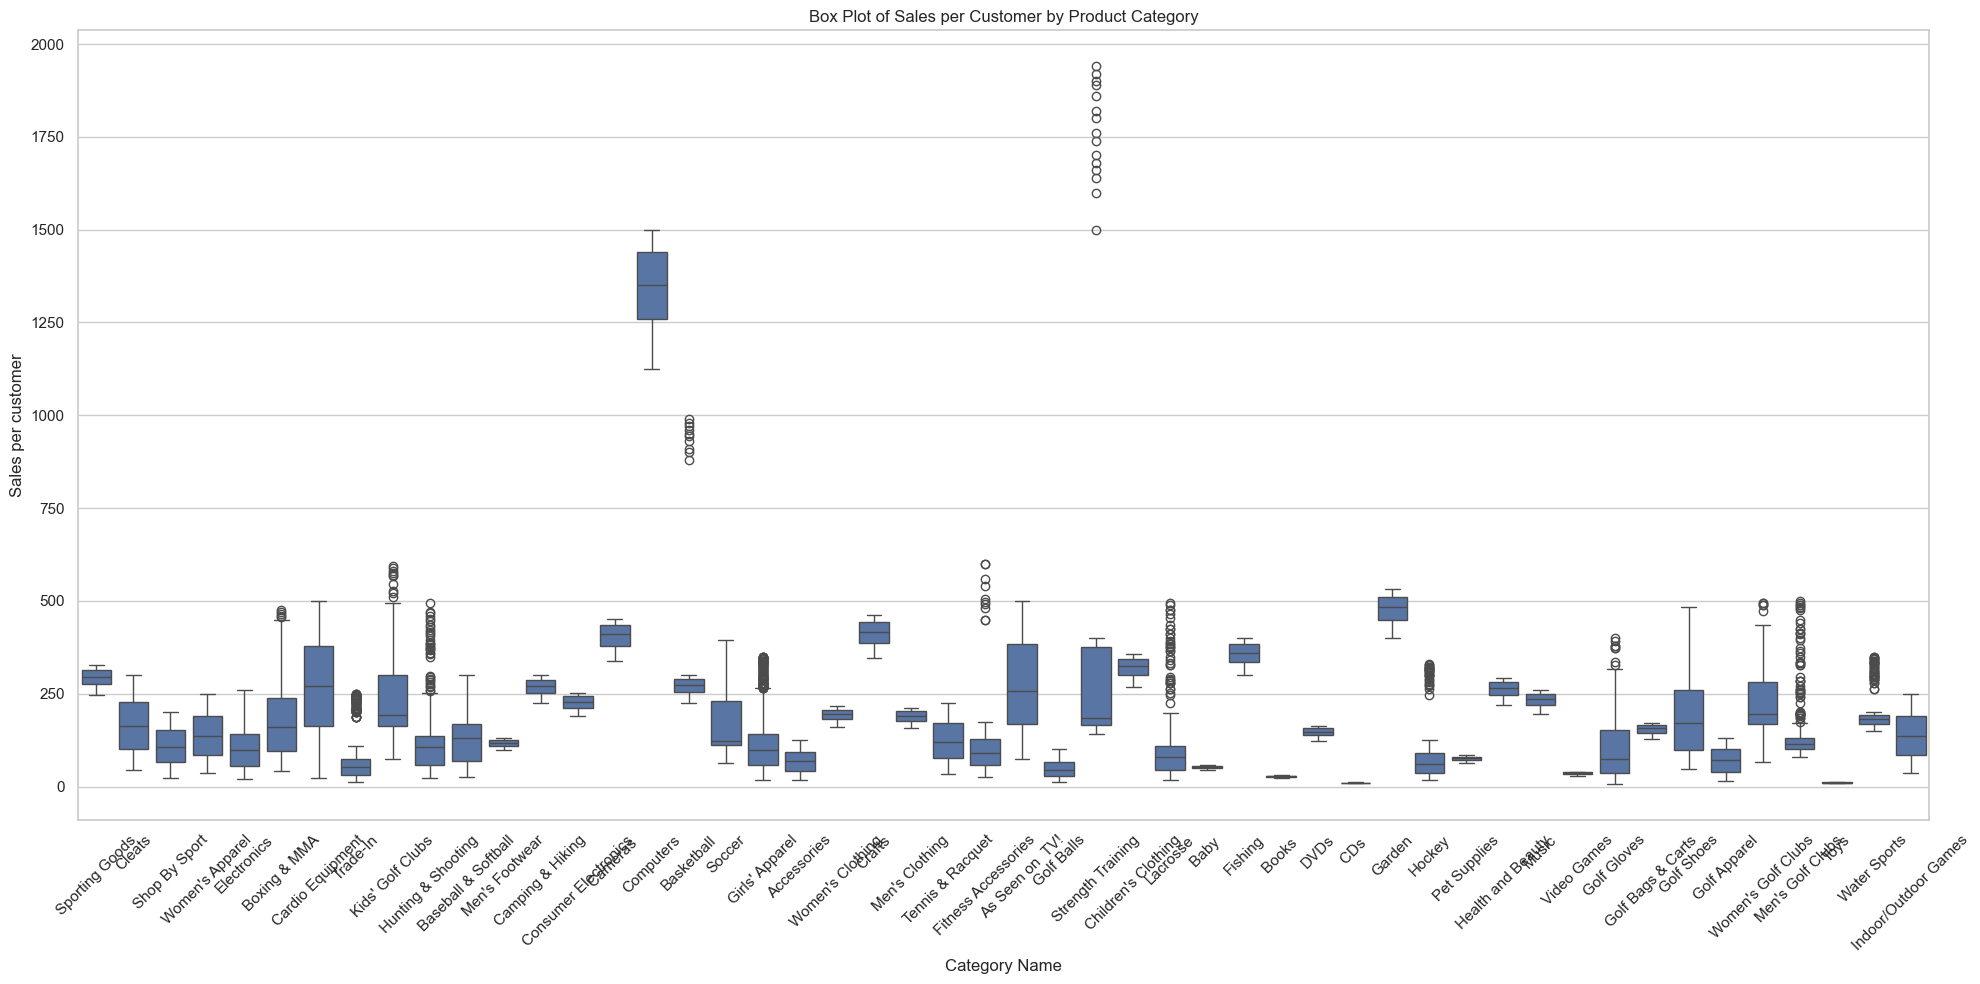

In [82]:
# Box Plot for Outliers in Sales by Category (Box Plot)
plt.figure(figsize=(20, 10))
sns.boxplot(x='Category Name', y='Sales per customer', data=df)
plt.title("Box Plot of Sales per Customer by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion:The box plot identifies outliers in sales across product categories, suggesting that some categories may require further investigation to understand extreme values.

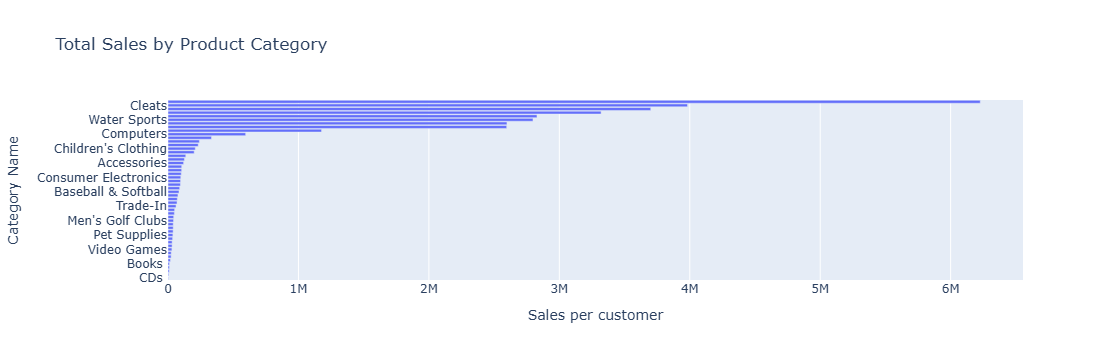

In [111]:
#Heatmap of correlation Matrix
import plotly.express as px

# Total Sales by Product Category (Interactive Bar Chart)
fig = px.bar(category_sales.reset_index(), x='Sales per customer', y='Category Name',
             title="Total Sales by Product Category", orientation='h')
fig.show()



Conclusion:The correlation heatmap shows strong relationships between key numerical features, which can inform strategic decisions in supply chain management.

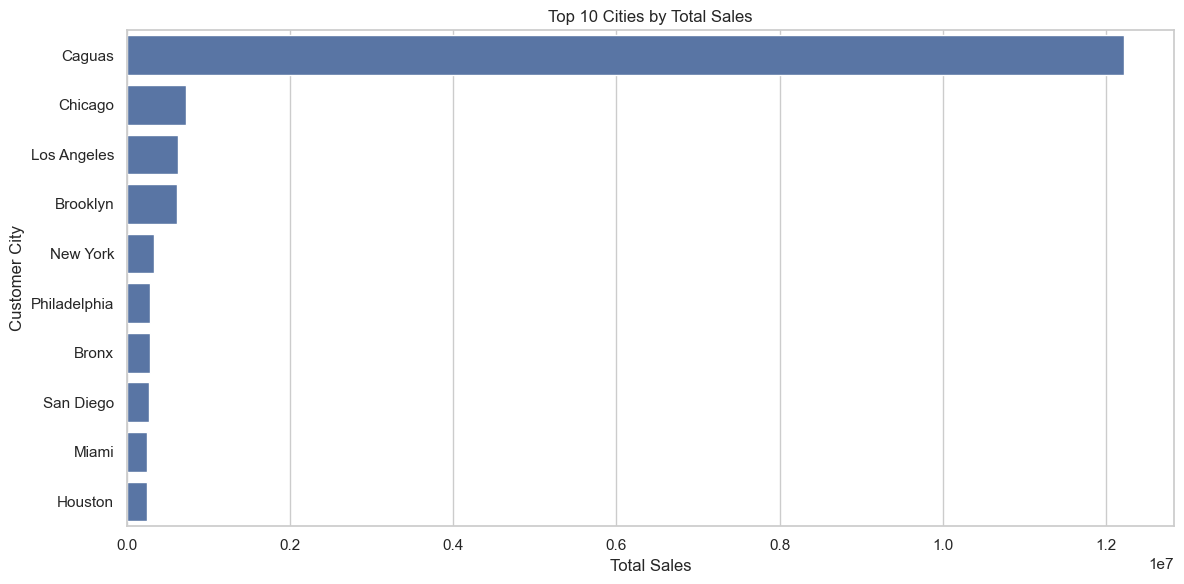

In [115]:
# Calculate total sales by customer city
city_sales = df.groupby('Customer City')['Sales per customer'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.values, y=city_sales.index)  # Removed palette argument
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer City")
plt.tight_layout()
plt.show()



The bar plot indicates that sales are concentrated in a few major cities, suggesting that targeted marketing efforts could enhance performance in these regions.

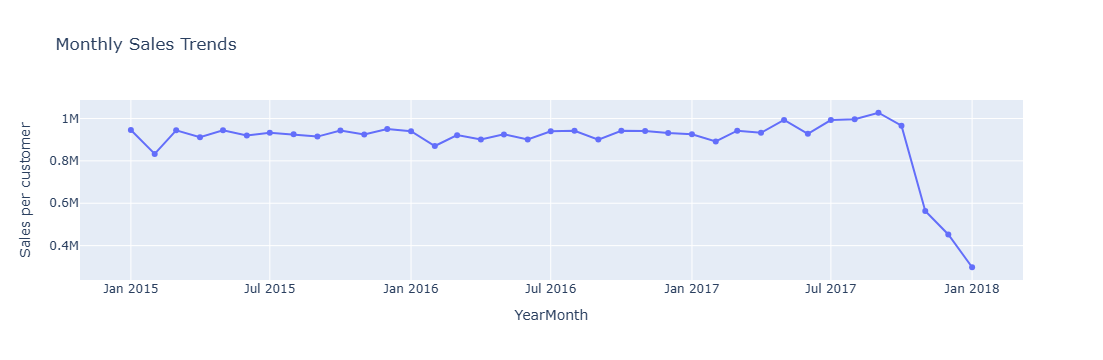

In [99]:
import plotly.express as px

# Prepare data for interactive line plot
sales_trend = df.groupby('YearMonth')['Sales per customer'].sum().reset_index()
sales_trend['YearMonth'] = sales_trend['YearMonth'].astype(str)

# Interactive line plot
fig = px.line(sales_trend, x='YearMonth', y='Sales per customer', title='Monthly Sales Trends', markers=True)
fig.show()


Conclusion:The monthly sales trend analysis indicates a consistent increase in sales over the observed periods, reflecting positive growth in customer demand.

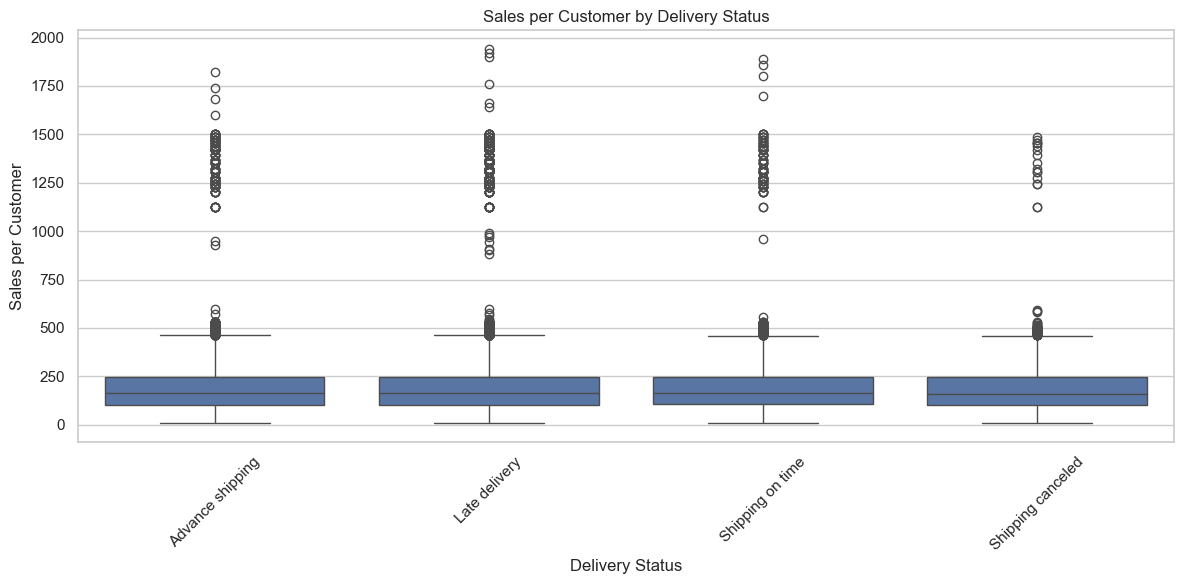

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Delivery Status', y='Sales per customer', data=df)
plt.title("Sales per Customer by Delivery Status")
plt.xlabel("Delivery Status")
plt.ylabel("Sales per Customer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion:The analysis of sales per customer by delivery status demonstrates that timely deliveries correlate with higher sales, emphasizing the importance of efficient logistics.